In [1]:
import sys
sys.path.append('..')

from agrid.grid import Grid
from agrid.acc import download

In [3]:
km = 1000
ant = Grid(crs=3031, res = [10*km, 10*km], 
           left = -3100*km, 
           up=3100*km, 
           right = 3100*km, 
           down = -3100*km)

In [4]:
url_raster = '''
    https://www.naturalearthdata.com/http//
    www.naturalearthdata.com/download/50m/
    raster/HYP_50M_SR_W.zip'''

raster_file = '../../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif'

File ../../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif already exists.


../agrid/grid.py:1105: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  epsg=basemap_epsg, **kwargs)


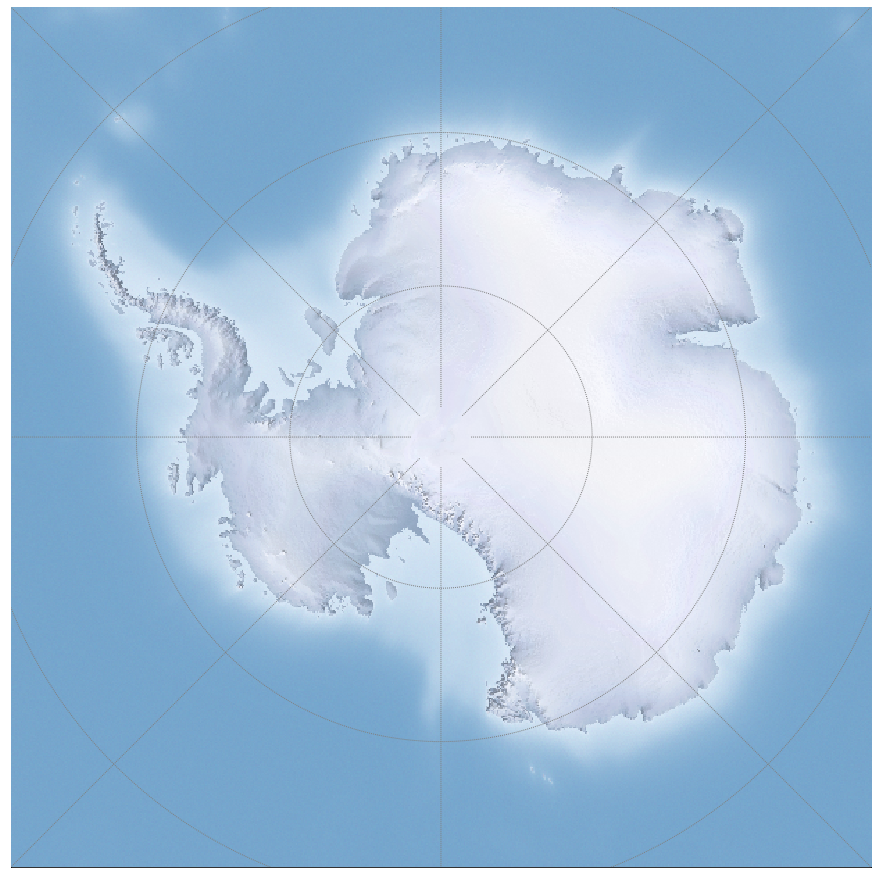

In [5]:
download(url_raster, raster_file)

ant.ds['RGB_RASTER'] = (('Y', 'X', 'RGB'), 
                ant.read_raster(raster_file,sub_sampling=3) )

ant.map_grid('RGB_RASTER', draw_coast=False)

In [6]:
vector_url = '''https://www.naturalearthdata.com/http//
    www.naturalearthdata.com/download/10m/physical/ne_10m_land.zip'''

vector_file = '../data/ne/ne_10m_land.zip'

download(vector_url, vector_file, 
        meta_dict={'Project' : 'Start using agrid', 'Dataset' : 'World vector'})

File ../data/ne/ne_10m_land.zip already exists.


['ne_10m_land.README.html',
 'ne_10m_land.VERSION.txt',
 'ne_10m_land.cpg',
 'ne_10m_land.dbf',
 'ne_10m_land.prj',
 'ne_10m_land.shp',
 'ne_10m_land.shx']

In [12]:
ant.ds['LAND'] = (('Y', 'X'), 
                ant.assign_shape('../data/ne/ne_10m_land.shp', 'scalerank', 
                                burn_val=1, map_to_int=False) )

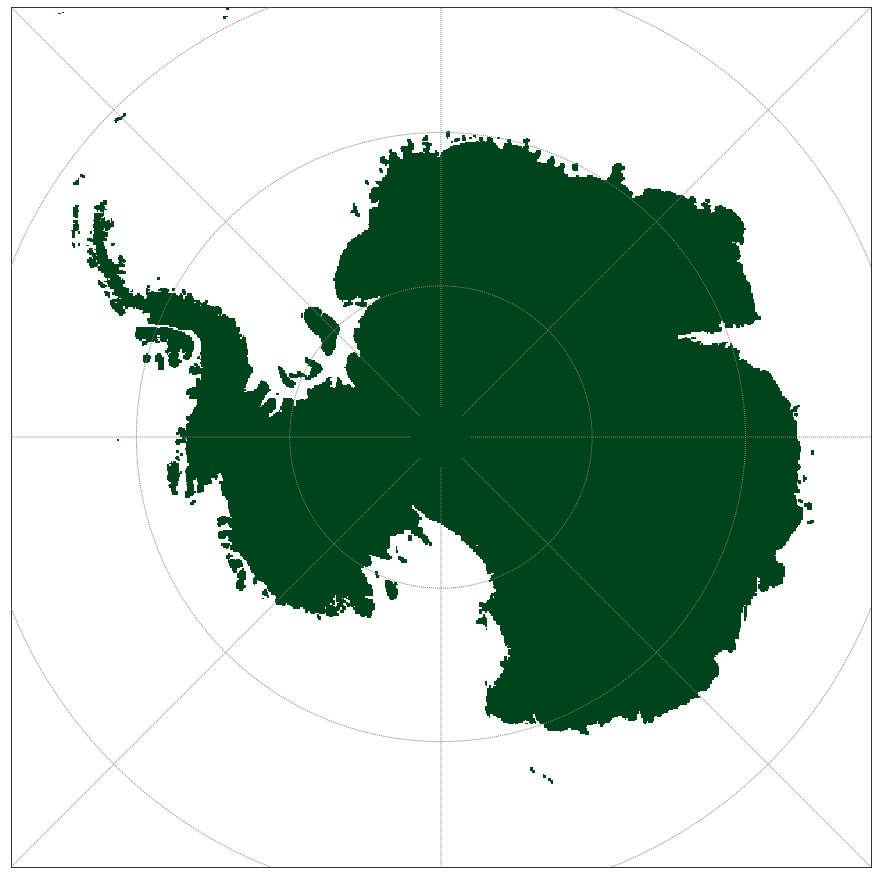

In [8]:
ant.map_grid('LAND', draw_coast=False, cmap='Greens_r')

In [9]:
arctic = Grid(crs=3995, res = [10*km, 10*km], 
           left = -3100*km, 
           up=3100*km, 
           right = 3100*km, 
           down = -3100*km)

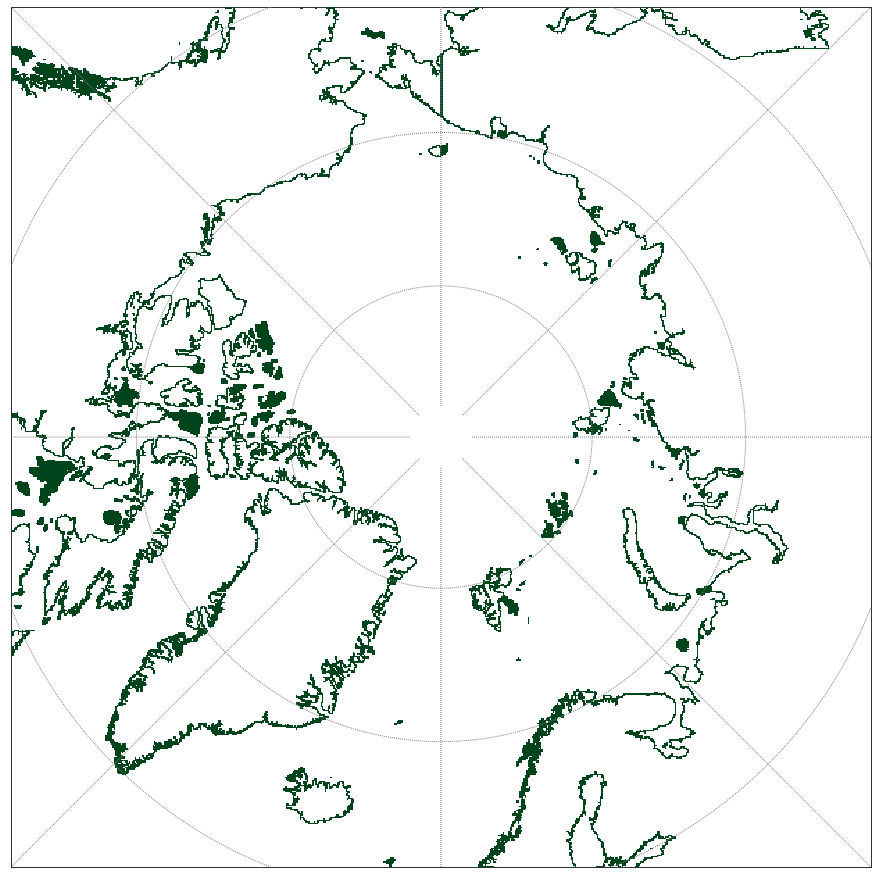

In [13]:
arctic.ds['LAND'] = (('Y', 'X'), 
                arctic.assign_shape('../data/ne/ne_10m_land.shp', 'scalerank', 
                                burn_val=1, map_to_int=False) )
arctic.map_grid('LAND', draw_coast=False, cmap='Greens_r')

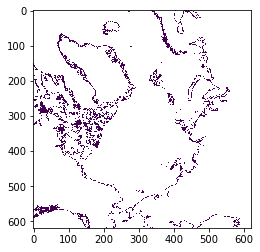

In [15]:
from matplotlib import pyplot as plt

plt.imshow(arctic.ds['LAND'])

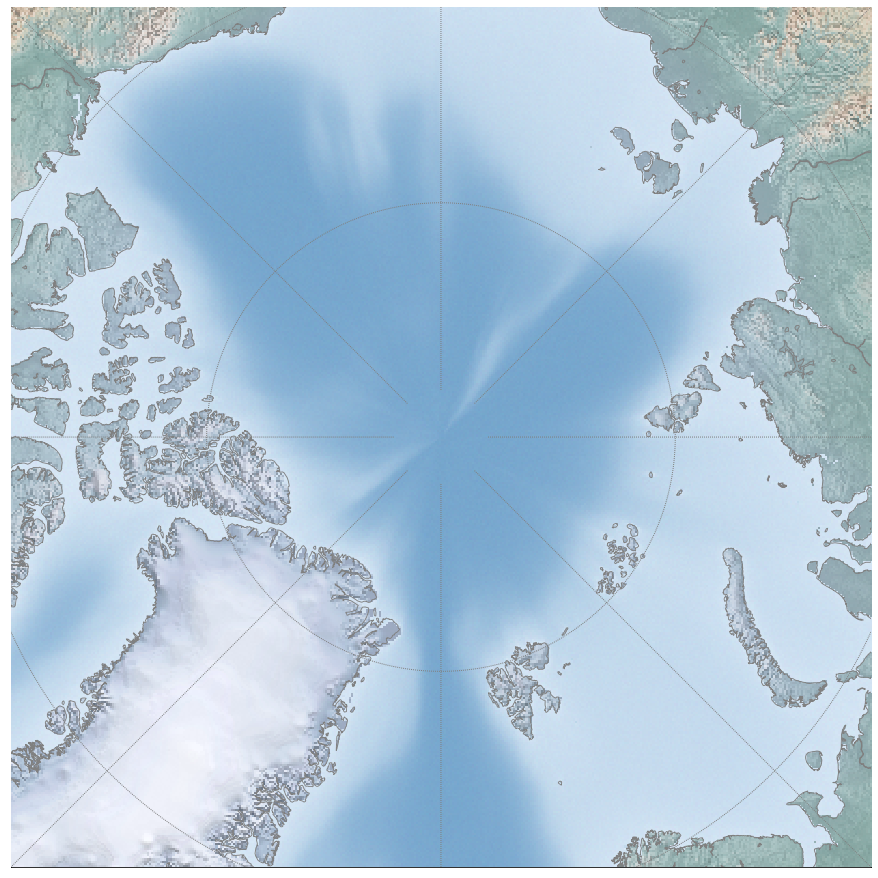

In [17]:
arctic.ds['RGB_RASTER'] = (('Y', 'X', 'RGB'), 
                arctic.read_raster(raster_file,sub_sampling=1) )

arctic.map_grid('RGB_RASTER', draw_coast=True)